In [93]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [94]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import roc_curve, auc

def eval_classification(model, pred, xtrain, ytrain, xtest, ytest):
    print ('Accuracy (Test Set): %.2f' % accuracy_score(ytest, pred))
    print ('Precision (Test Set): %.2f' % precision_score(ytest, pred))
    print ('Recall (Test Set): %.2f' % recall_score(ytest, pred))
    print ('F1-Score (Test Set): %.2f' % f1_score(ytest, pred))
    
    fpr, tpr, tresholds = roc_curve(ytest, pred, pos_label=1)
    print('AUC: %.2f' %auc(fpr, tpr))
    
def show_feature_importance(model):
    feat_importances = pd.Series(model.feature_importances_, index=X.columns)
    ax = feat_importances.nlargest(25).plot(kind='barh', figsize = (10, 8))
    ax.invert_yaxis()
    
    plt.xlabel('score')
    plt.ylabel('feature')
    plt.title('feature importance score')
    
def show_best_hyperparameter(model, hyperparameters):
    for key, value in hyperparameters.items():
        print('Best '+key+':', model.get_params()[key])

# Ensemble Methods

In [95]:
df = pd.read_csv('breastcancer.csv')
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [96]:
import pandas as pd
df = pd.read_csv('breastcancer.csv')
df.drop(['Unnamed: 32', 'id'], inplace = True, axis = 1)
df['diagnosis'] = [1 if i.strip() == 'M' else 0 for i in df.diagnosis]

# target: benign = 0, malignant = 1

X = df.drop(columns=['diagnosis'])
y = df['diagnosis']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 14)

In [97]:
df.tail()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
564,1,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,1,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,1,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,1,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400
568,0,7.76,24.54,47.92,181.0,0.05263,0.04362,0.00000,0.00000,0.1587,...,9.456,30.37,59.16,268.6,0.08996,0.06444,0.0000,0.0000,0.2871,0.07039


### What metrics should we use?

##### Decision Tree

In [98]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier(random_state=14)
model.fit(X_train,y_train)

y_pred = model.predict(X_test)
eval_classification(model, y_pred, X_train, y_train, X_test, y_test)

Accuracy (Test Set): 0.90
Precision (Test Set): 0.91
Recall (Test Set): 0.81
F1-Score (Test Set): 0.86
AUC: 0.88


##### Bagging: Random Forest

In [99]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(random_state=14)
rf.fit(X_train,y_train)

y_pred = rf.predict(X_test)
eval_classification(rf, y_pred, X_train, y_train, X_test, y_test)

Accuracy (Test Set): 0.94
Precision (Test Set): 0.95
Recall (Test Set): 0.89
F1-Score (Test Set): 0.92
AUC: 0.93


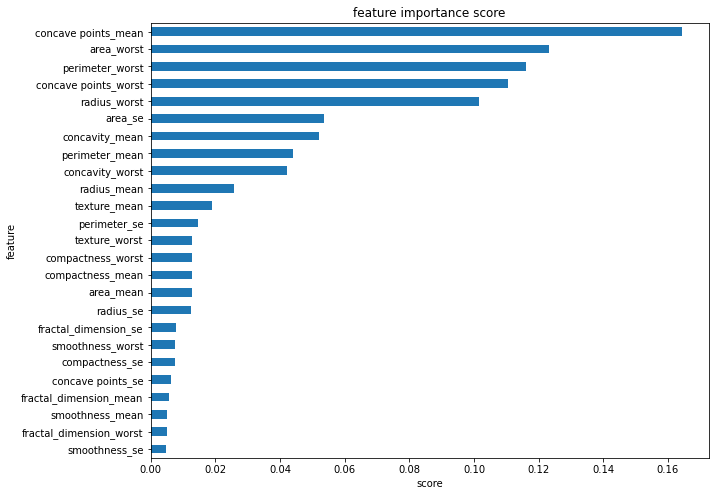

In [100]:
show_feature_importance(rf)

##### Hyperparameter Tuning

In [101]:
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV

hyperparameters = dict(
                       n_estimators = [int(x) for x in np.linspace(start = 100, stop = 2000, num = 20)], 
                       bootstrap = [True], 
                       criterion = ['gini','entropy'],
                       max_depth = [int(x) for x in np.linspace(10, 110, num = 11)],  
                       min_samples_split = [int(x) for x in np.linspace(start = 2, stop = 10, num = 5)], 
                       min_samples_leaf = [int(x) for x in np.linspace(start = 1, stop = 10, num = 5)], 
                       max_features = ['auto', 'sqrt', 'log2'], 
                       n_jobs = [-1], 
                      )

rf = RandomForestClassifier(random_state=14)
rf_tuned = RandomizedSearchCV(rf, hyperparameters, cv=5, random_state=42, scoring='recall')
rf_tuned.fit(X_train,y_train)

y_pred = rf_tuned.predict(X_test)
eval_classification(rf_tuned, y_pred, X_train, y_train, X_test, y_test)

Accuracy (Test Set): 0.95
Precision (Test Set): 0.97
Recall (Test Set): 0.90
F1-Score (Test Set): 0.93
AUC: 0.94


In [102]:
show_best_hyperparameter(rf_tuned.best_estimator_, hyperparameters)

Best n_estimators: 400
Best bootstrap: True
Best criterion: gini
Best max_depth: 110
Best min_samples_split: 4
Best min_samples_leaf: 1
Best max_features: log2
Best n_jobs: -1


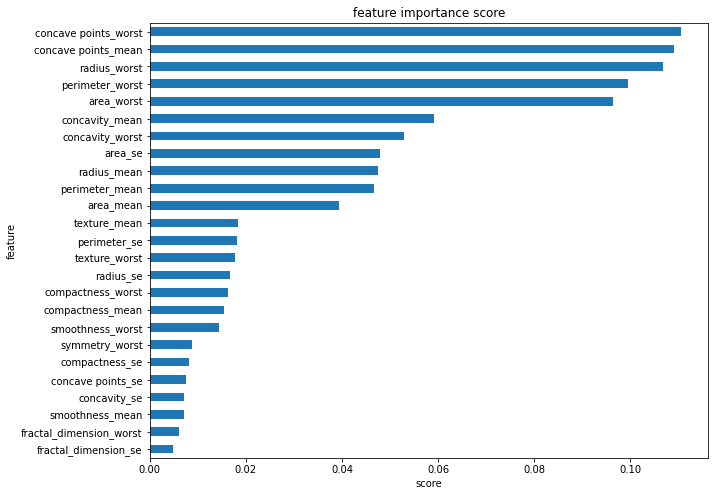

In [103]:
show_feature_importance(rf_tuned.best_estimator_)

##### Boosting: AdaBosot

In [104]:
from sklearn.ensemble import AdaBoostClassifier
ab = AdaBoostClassifier(random_state=14)
ab.fit(X_train,y_train)

y_pred = ab.predict(X_test)
eval_classification(ab, y_pred, X_train, y_train, X_test, y_test)

Accuracy (Test Set): 0.95
Precision (Test Set): 0.95
Recall (Test Set): 0.90
F1-Score (Test Set): 0.93
AUC: 0.94


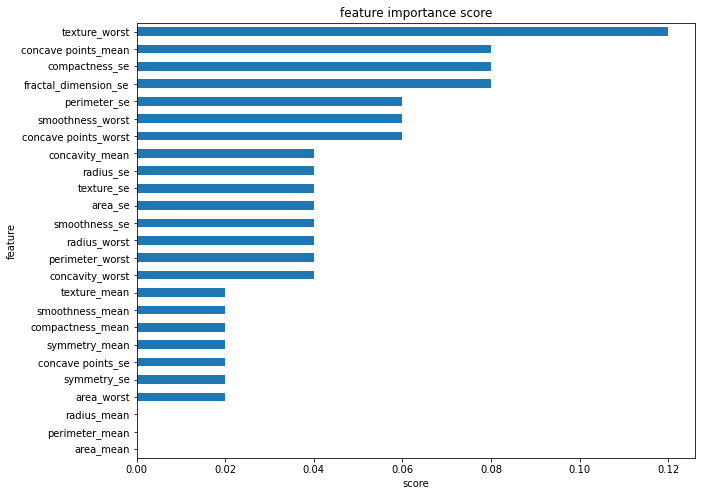

In [105]:
show_feature_importance(ab)

##### Hyperparameter Tuning Adaboost

In [112]:
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
import numpy as np

hyperparameters = dict(n_estirmators = [int(x) for x in np.linspace(start = 11, stop = 2000, num = 20)],
                       learning_rate = [float(x) for x in np.linspace(start = 0.001, stop = 0.1, num = 20)],
                       algorithm = ['SAMME', 'SAMME.R']
                      )

ab = AdaBoostClassifier(random_state=14)
ab_tuned = RandomizedSearchCV(ab, hyperparameters, random_state=14, cv=5, scoring='recall')
ab_tuned.fit(X_train,y_train)

y_pred = ab_tuned.predict(X_test)
eval_classification(ab_tuned, y_pred, X_train, y_train, X_test, y_test)

ValueError: Invalid parameter n_estirmators for estimator AdaBoostClassifier(random_state=14). Check the list of available parameters with `estimator.get_params().keys()`.

In [115]:
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV

hyperparameters = dict(n_estimators = [int(x) for x in np.linspace(start = 100, stop = 2000, num = 20)],
                       learning_rate = [float(x) for x in np.linspace(start = 0.001, stop = 0.1, num = 20)],  
                       algorithm = ['SAMME', 'SAMME.R']
                      )

ab = AdaBoostClassifier(random_state=14)
ab_tuned = RandomizedSearchCV(ab, hyperparameters, random_state=42, cv=5, scoring='recall')
ab_tuned.fit(X_train,y_train)


y_pred = ab_tuned.predict(X_test)
eval_classification(ab_tuned, y_pred, X_train, y_train, X_test, y_test)

Accuracy (Test Set): 0.97
Precision (Test Set): 1.00
Recall (Test Set): 0.92
F1-Score (Test Set): 0.96
AUC: 0.96


In [116]:
show_best_hyperparameter(ab_tuned.best_estimator_, hyperparameters)

Best n_estimators: 1700
Best learning_rate: 0.07394736842105264
Best algorithm: SAMME.R


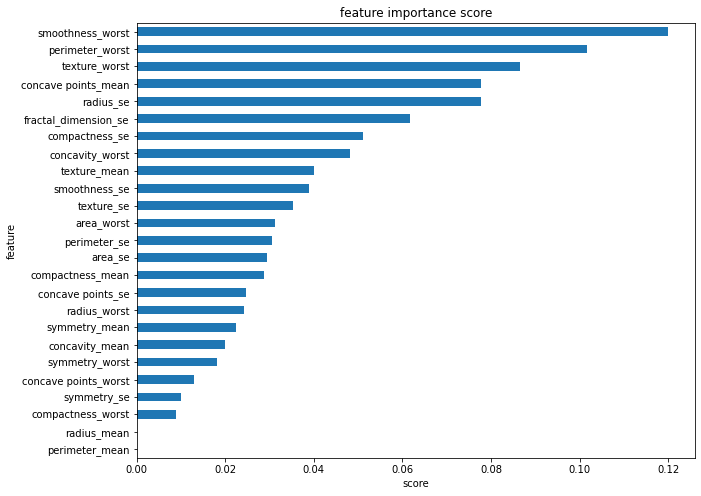

In [117]:
show_feature_importance(ab_tuned.best_estimator_)

##### Boosting: XGBoost

In [118]:
pip install xgboost

Note: you may need to restart the kernel to use updated packages.


'C:\Users\fahrizan' is not recognized as an internal or external command,
operable program or batch file.


In [119]:
from xgboost import XGBClassifier
xg = XGBClassifier(random_state=14)
xg.fit(X_train, y_train)

y_pred = xg.predict(X_test)
eval_classification(xg, y_pred, X_train, y_train, X_test, y_test)

[14:26:19] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Accuracy (Test Set): 0.95
Precision (Test Set): 0.97
Recall (Test Set): 0.89
F1-Score (Test Set): 0.93
AUC: 0.94


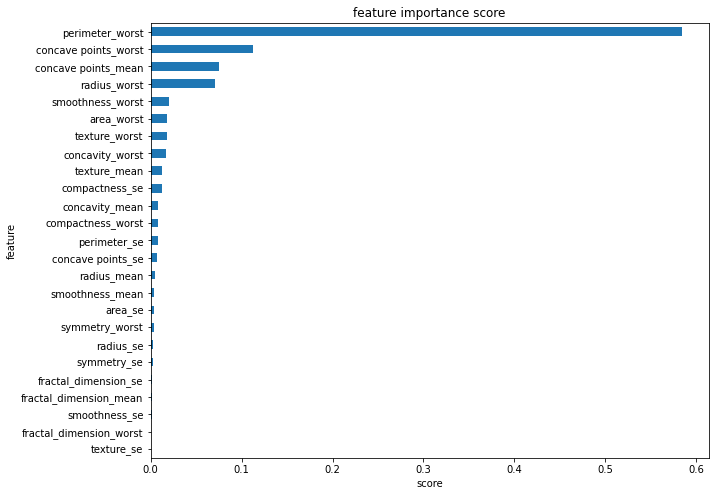

In [120]:
show_feature_importance(xg)

##### Hyperparameter Tuning

In [121]:
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
import numpy as np

hyperparameters = {
                    'max_depth' : [int(x) for x in np.linspace(10, 110, num = 11)],
                    'min_child_weight' : [int(x) for x in np.linspace(1, 20, num = 11)],
                    'gamma' : [float(x) for x in np.linspace(0, 1, num = 11)],
                    'tree_method' : ['auto', 'exact', 'approx', 'hist'],

                    'colsample_bytree' : [float(x) for x in np.linspace(0, 1, num = 11)],
                    'eta' : [float(x) for x in np.linspace(0, 1, num = 100)],

                    'lambda' : [float(x) for x in np.linspace(0, 1, num = 11)],
                    'alpha' : [float(x) for x in np.linspace(0, 1, num = 11)]
                    }

xg = XGBClassifier(random_state=42)
xg_tuned = RandomizedSearchCV(xg, hyperparameters, cv=5, random_state=42, scoring='recall')
xg_tuned.fit(X_train,y_train)

y_pred = xg_tuned.predict(X_test)
eval_classification(xg_tuned, y_pred, X_train, y_train, X_test, y_test)

[14:27:17] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[14:27:17] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[14:27:17] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[14:27:17] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

[14:27:20] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[14:27:20] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[14:27:20] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[14:27:21] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

In [122]:
show_best_hyperparameter(xg_tuned.best_estimator_, hyperparameters)

Best max_depth: 110
Best min_child_weight: 2
Best gamma: 0.5
Best tree_method: hist
Best colsample_bytree: 1.0
Best eta: 0.7777777777777778
Best lambda: 0.2
Best alpha: 0.1


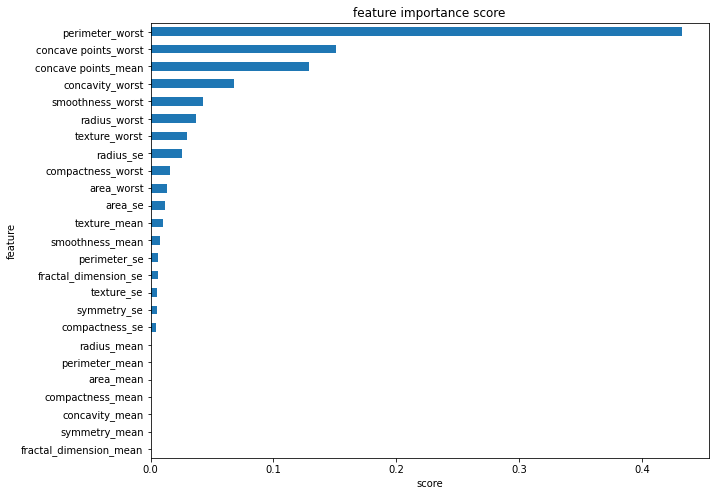

In [123]:
show_feature_importance(xg_tuned.best_estimator_)